In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.rename(columns = {"Genre":"Gender"}, inplace = True)

In [ ]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Univariate Anlysis 


Text(0.5, 1.0, 'Age Based Analysis')

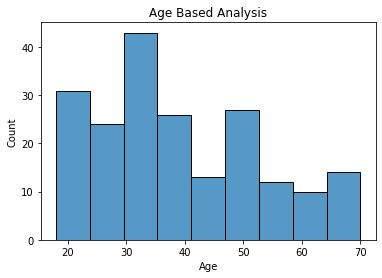

In [ ]:
sns.histplot(data=data, x="Age")
plt.title("Age Based Analysis")

Text(0.5, 1.0, 'Gender Based Analysis')

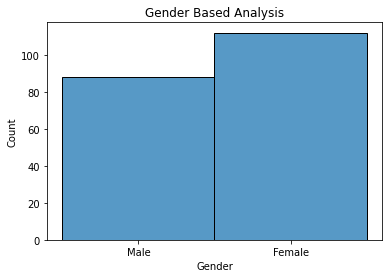

In [ ]:
sns.histplot(data=data, x="Gender")
plt.title("Gender Based Analysis")

<AxesSubplot:>

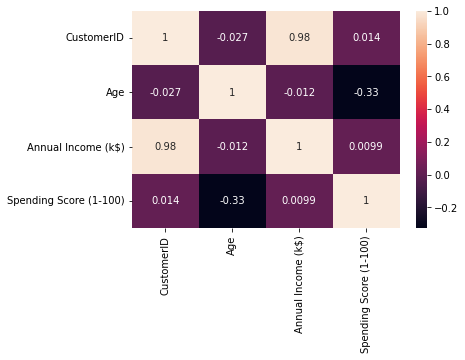

In [ ]:
sns.heatmap(data.corr(), annot=True)

negetive correlation between age and spending score 

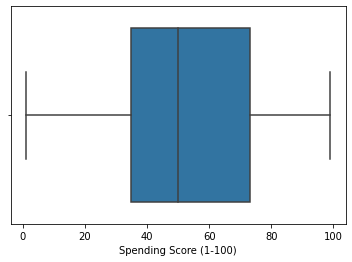

In [ ]:
sns.boxplot(x=data["Spending Score (1-100)"])
plt.show()

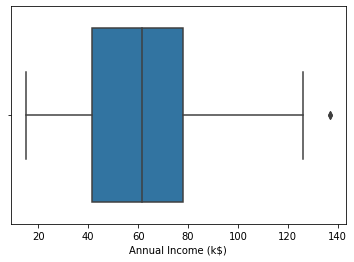

In [ ]:
sns.boxplot(x=data["Annual Income (k$)"])
plt.show()

In [ ]:
male = data[data["Gender"]=="Male"]
male["Spending Score (1-100)"].mean()

48.51136363636363

<AxesSubplot:>

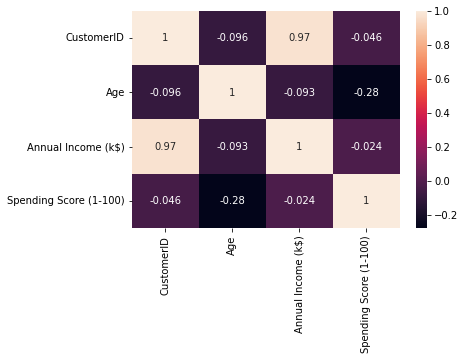

In [ ]:
sns.heatmap(male.corr(), annot=True)

In [ ]:
female = data[data["Gender"]=="Female"]
female["Spending Score (1-100)"].mean()

51.526785714285715

<AxesSubplot:>

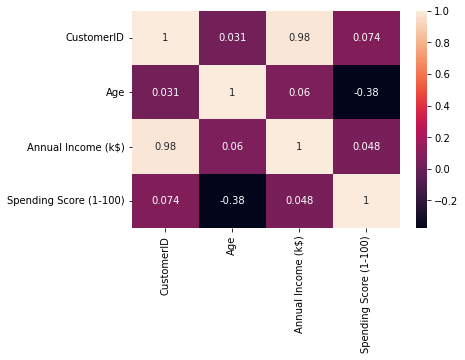

In [ ]:
sns.heatmap(female.corr(), annot=True)

In [ ]:
male["Annual Income (k$)"].mean()

62.22727272727273

In [ ]:
female["Annual Income (k$)"].mean()

59.25

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


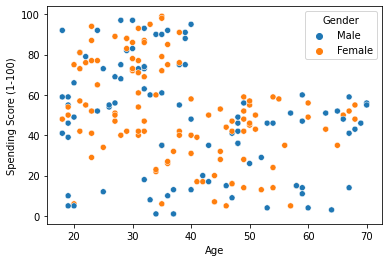

In [ ]:
sns.scatterplot('Age', 'Spending Score (1-100)', hue='Gender', data=data);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


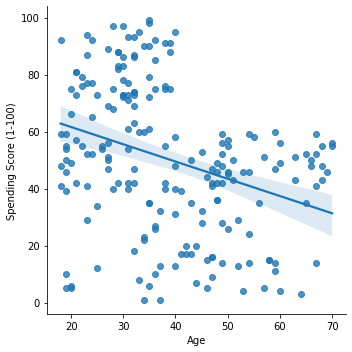

In [ ]:
sns.lmplot('Age', 'Spending Score (1-100)', data=data);

In [ ]:
gender = pd.get_dummies(data["Gender"])
data = pd.concat([data, gender],axis = "columns")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,1
2,3,Female,20,16,6,1,0
3,4,Female,23,16,77,1,0
4,5,Female,31,17,40,1,0


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
datanew = data.drop("Gender",axis=1)
datanew.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: F

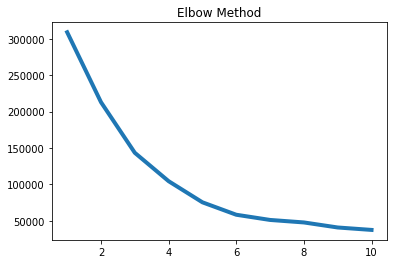

In [ ]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(datanew.iloc[:,1:])
    wcss.append(kmeans.inertia_)   
plt.plot(range(1,11),wcss, linewidth=4)
plt.title("Elbow Method")
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
lab = kmeans.labels_
centre = kmeans.cluster_centers_
print(lab)
print(centre)

[3 5 3 5 3 5 7 5 7 5 7 5 7 5 3 5 3 5 3 5 3 5 7 5 7 5 3 5 3 5 7 5 7 5 7 5 3
 5 3 5 9 5 3 0 3 5 9 0 0 0 9 0 0 9 9 4 9 9 0 9 9 0 9 9 9 0 4 9 0 0 9 4 9 9
 9 0 4 4 0 4 9 4 9 4 0 4 9 0 0 4 9 0 4 4 0 0 4 0 4 0 0 4 9 0 4 0 9 4 9 9 9
 0 4 0 0 0 9 4 4 4 0 4 4 6 8 6 4 6 8 6 8 6 0 6 8 6 8 6 8 6 8 6 0 6 8 6 4 6
 8 6 8 6 8 6 8 6 8 6 8 6 4 6 8 6 8 6 8 6 8 6 8 6 8 6 8 6 8 6 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]
[[ 24.80645161  55.32258065  50.16129032   0.64516129   0.35483871]
 [ 42.63636364 108.18181818  21.27272727   0.63636364   0.36363636]
 [ 32.45454545 108.18181818  82.72727273   0.54545455   0.45454545]
 [ 37.61538462  26.30769231  28.23076923   0.61538462   0.38461538]
 [ 46.19230769  60.61538462  46.15384615   0.61538462   0.38461538]
 [ 25.27272727  25.72727273  79.36363636   0.59090909   0.40909091]
 [ 32.78571429  78.03571429  81.89285714   0.53571429   0.46428571]
 [ 54.          25.           8.77777778   0.55555556   0.44444444]
 [ 39.36363636  79.13636364  13.36363636   0.3636